In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mapping = {
    1: "Quận 1", 3: "Quận 3", 4: "Quận 4", 5: "Quận 5", 6: "Quận 6",
    7: "Quận 7", 8: "Quận 8", 10: "Quận 10", 11: "Quận 11", 12: "Quận 12",
    2: "Bình Thạnh", 9: "Gò Vấp", 13: "Phú Nhuận", 14: "Tân Bình", 15: "Tân Phú",
    16: "Bình Tân", 17: "Thủ Đức", 18: "Bình Chánh", 19: "Cần Giờ",
    20: "Củ Chi", 21: "Hóc Môn", 22: "Nhà Bè"
}
mapping_noi_that = {0: "Không", 1: "Cơ bản", 2: "Đầy đủ", 3: "Cao cấp"}

In [3]:
df = pd.read_csv("./DSPhongTro_DaXuLy.csv", encoding='utf-8-sig', sep='\t')
df.head()

,ID,Địa chỉ,Diện tích,Số phòng ngủ,Số toilet,Nội thất,Mức giá,Ngày đăng tin
0,41278673.0,14,20.0,1.0,1.0,2,4.0,2024-10-22
1,41290558.0,14,60.0,2.0,2.0,0,10.0,2024-10-23
2,41198378.0,3,45.0,1.0,1.0,0,7.3,2024-10-23
3,41098096.0,17,28.0,1.0,1.0,0,2.8,2024-10-23
4,41298012.0,1,30.0,1.0,1.0,2,4.8,2024-10-23


In [4]:
df.dtypes

ID               float64
Địa chỉ            int64
Diện tích        float64
Số phòng ngủ     float64
Số toilet        float64
Nội thất           int64
Mức giá          float64
Ngày đăng tin     object
dtype: object

#  3.2.4 Tiện nghi- Tiện ích

## Câu hỏi 1: Khu vực nào phòng trọ có sẵn nội thất nhiều? 

### Bước 1: Nhóm các phòng trọ theo khu vực (Địa chỉ) và tính tổng giá trị cột Nội thất cho mỗi khu vực

In [11]:
noi_that_theo_khu_vuc = df.groupby('Địa chỉ')['Nội thất'].sum()
noi_that_theo_khu_vuc

Địa chỉ
1      972
2     1043
3      369
4      109
5      140
6       84
7      633
8      213
9      497
13     358
14     676
15     335
16     172
17     168
18     114
19       6
21      19
22      44
Name: Nội thất, dtype: int64

### Bước 2: Sắp xếp các khu vực theo tổng giá trị Nội thất theo thứ tự giảm dần

In [12]:
noi_that_theo_khu_vuc_sorted = noi_that_theo_khu_vuc.sort_values(ascending=False)
noi_that_theo_khu_vuc_sorted

Địa chỉ
2     1043
1      972
14     676
7      633
9      497
3      369
13     358
15     335
8      213
16     172
17     168
5      140
18     114
4      109
6       84
22      44
21      19
19       6
Name: Nội thất, dtype: int64

### Bước 3: Xác định khu vực đứng đầu danh sách

In [13]:
khu_vuc_nhieu_noi_that_nhat = noi_that_theo_khu_vuc_sorted.index[0]
print("Khu vực có nhiều phòng trọ có sẵn nội thất nhất: ", khu_vuc_nhieu_noi_that_nhat)

Khu vực có nhiều phòng trọ có sẵn nội thất nhất:  2


## Trả lời
Ta thấy địa chỉ có số thứ tự 2 có các phòng trọ có sẵn nội thất nhiều nhất, dựa trên ánh xạ `address` ta biết được rằng đây là khu vực quận Bình Thạnh

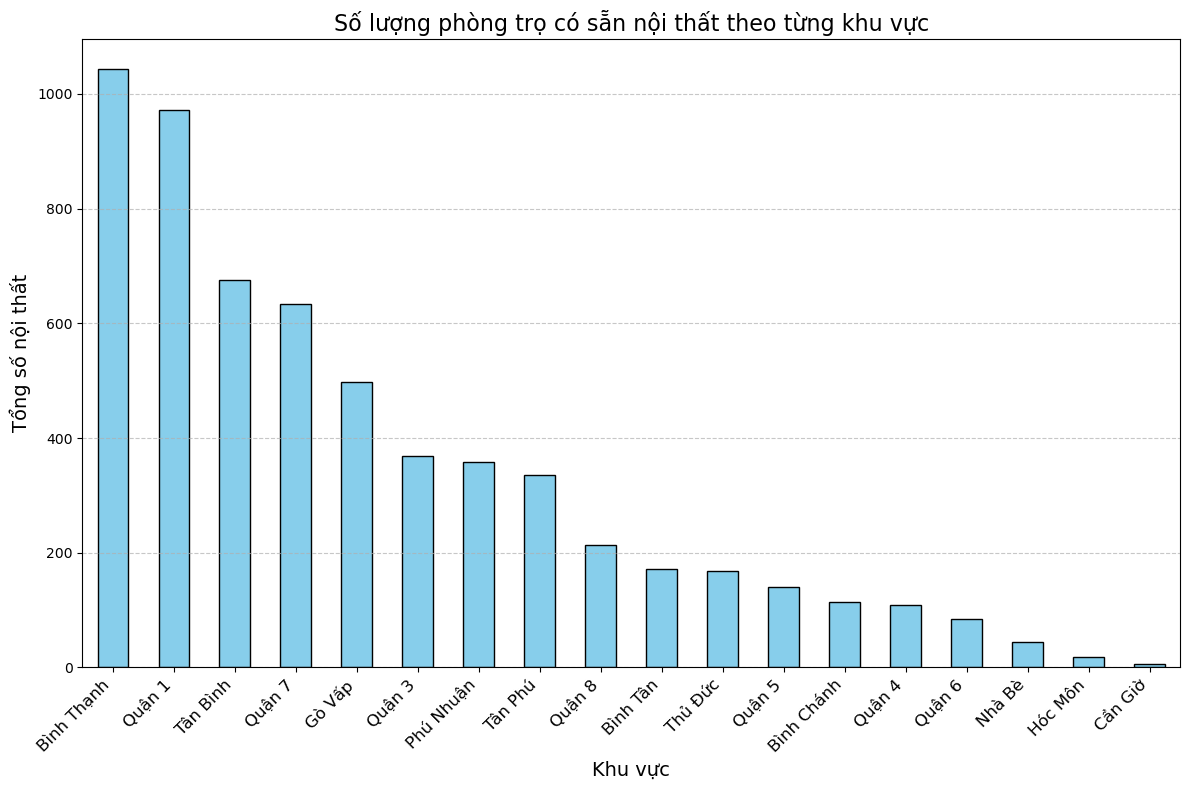

In [16]:
noi_that_theo_khu_vuc_sorted_named = noi_that_theo_khu_vuc_sorted.rename(index=mapping)

# Plot the bar chart
plt.figure(figsize=(12, 8))
noi_that_theo_khu_vuc_sorted_named.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.title("Số lượng phòng trọ có sẵn nội thất theo từng khu vực", fontsize=16)
plt.xlabel("Khu vực", fontsize=14)
plt.ylabel("Tổng số nội thất", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

### Nhận xét
1. Về phân bố:
- Bình Thạnh dẫn đầu với hơn 1000 phòng trọ có nội thất, cho thấy đây là khu vực tập trung nhiều phòng trọ cao cấp, được đầu tư kỹ lưỡng
- Quận 1 đứng thứ hai với khoảng 950 phòng, phù hợp với vị thế là khu vực trung tâm, phục vụ đối tượng có nhu cầu ở ngay

2. Đặc điểm thị trường:
- Các khu vực trung tâm (Q1, Q3, Phú Nhuận) và khu vực giáp trung tâm (Bình Thạnh, Tân Bình) có nhiều phòng trọ có sẵn nội thất
- Điều này phản ánh xu hướng đầu tư phòng trọ cao cấp, phục vụ nhóm khách hàng có nhu cầu thuê phòng "dọn vào ở ngay"

3. Về phân khúc thị trường:
- Các quận trung tâm tập trung nhiều phòng trọ có nội thất, phục vụ phân khúc khách hàng cao cấp hơn
- Các khu vực ngoại thành (Cần Giờ, Hóc Môn, Nhà Bè) có ít phòng trọ có nội thất, có thể do đặc thù khách thuê thường ưu tiên giá rẻ và tự trang bị nội thất

4. Hàm ý thị trường:
- Sự chênh lệch số lượng phòng có nội thất giữa các khu vực phản ánh sự phân hóa về phân khúc thị trường và đối tượng khách hàng
- Xu hướng đầu tư phòng trọ có sẵn nội thất tập trung chủ yếu ở các khu vực trung tâm và các quận phát triển

## Câu hỏi 2: Số lượng phòng nhóm theo nội thất phân bố như thế nào?

### Bước 1: Đếm số lượng phòng theo từng loại nội thất.

In [5]:
# Thêm cột Nội thất theo mô tả
df['Nội thất (Mô tả)'] = df['Nội thất'].map(mapping_noi_that)

# Đếm số lượng phòng nhóm theo loại nội thất
so_luong_theo_noi_that = df['Nội thất (Mô tả)'].value_counts()
so_luong_theo_noi_that

Nội thất (Mô tả)
Đầy đủ     2708
Không      1028
Cơ bản      488
Cao cấp      16
Name: count, dtype: int64

### Bước 2: Vẽ biểu đồ trực quan

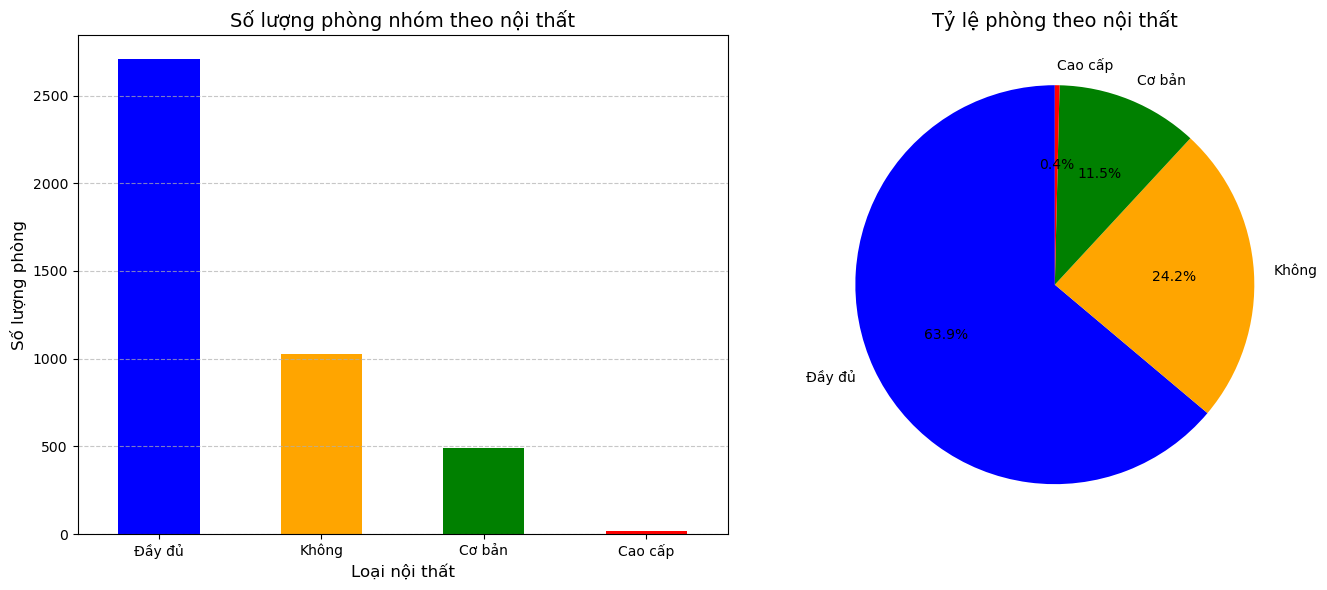

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Subplot 1: Biểu đồ cột
so_luong_theo_noi_that.plot(
    kind='bar', 
    color=['blue', 'orange', 'green', 'red'], 
    ax=axes[0]
)
axes[0].set_title("Số lượng phòng nhóm theo nội thất", fontsize=14)
axes[0].set_xlabel("Loại nội thất", fontsize=12)
axes[0].set_ylabel("Số lượng phòng", fontsize=12)
axes[0].tick_params(axis='x', rotation=0)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Subplot 2: Biểu đồ tròn
so_luong_theo_noi_that.plot(
    kind='pie', 
    autopct='%1.1f%%', 
    colors=['blue', 'orange', 'green', 'red'], 
    startangle=90, 
    ax=axes[1]
)
axes[1].set_title("Tỷ lệ phòng theo nội thất", fontsize=14)
axes[1].set_ylabel("")  # Bỏ nhãn Y để gọn biểu đồ

# Tùy chỉnh khoảng cách giữa 2 biểu đồ
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

## Trả lời
Từ hai biểu đồ trên, tôi có một số nhận xét sau:

1. Về số lượng phòng theo nội thất:
- Phần lớn các phòng có nội thất đầy đủ (khoảng 2500 phòng)
- Số phòng không có nội thất xếp thứ 2 (khoảng 1000 phòng)
- Phòng có nội thất cơ bản đứng thứ 3 (khoảng 500 phòng)
- Rất ít phòng có nội thất cao cấp

2. Về tỷ lệ phân bổ:
- Phòng có nội thất đầy đủ chiếm đa số với 63.9%
- Phòng không có nội thất chiếm 24.2%
- Phòng có nội thất cơ bản chiếm 11.5%
- Phòng có nội thất cao cấp chiếm tỷ lệ rất nhỏ (0.4%)

3. Nhận xét chung:
- Thị trường rõ ràng thiên về các phòng có nội thất đầy đủ
- Có rất ít sự đầu tư vào phân khúc nội thất cao cấp
- Vẫn có một phần đáng kể thị trường là phòng không có nội thất, có thể phù hợp với những người muốn tự trang bị nội thất theo ý thích

## Phân tích phân bố các phòng có nội thất "Đầy đủ" 

### Bước 1: Lọc dữ liệu các phòng có nội thất là "Đầy đủ" 

In [8]:
phong_noi_that_day_du = df[df['Nội thất'] == 2]

### Bước 2: Nhóm dữ liệu theo khu vực và đếm số lượng

In [9]:
so_luong_theo_khu_vuc = phong_noi_that_day_du.groupby('Địa chỉ').size()

### Bước 3: Sắp xếp kết quả giảm dần

In [12]:
so_luong_theo_khu_vuc_sorted = so_luong_theo_khu_vuc.sort_values(ascending=False)
so_luong_theo_khu_vuc_sorted = so_luong_theo_khu_vuc_sorted.rename(index=mapping)

### Bước 4: Vẽ biểu đồ cột để hiển thị

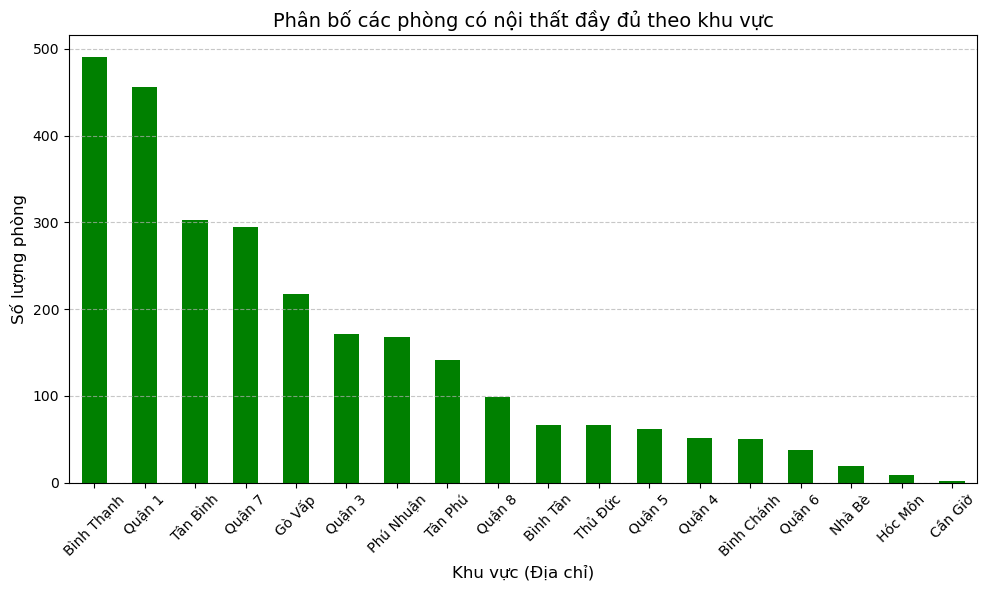

In [14]:
so_luong_theo_khu_vuc_sorted.plot(
    kind='bar',
    figsize=(10, 6),
    color='green'
)
plt.title('Phân bố các phòng có nội thất đầy đủ theo khu vực', fontsize=14)
plt.xlabel('Khu vực (Địa chỉ)', fontsize=12)
plt.ylabel('Số lượng phòng', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

### Nhận xét
Nhìn chung phân bố các phòng có nội thất đầy đủ có có sự phân bố giống với phân bố số lượng các phòng có sẵn nội thất  

## Câu hỏi 3:  Phần trăm số lượng phòng có từ 2 phòng ngủ?

### Bước 1: Đếm số lượng phòng trọ có `Số phòng ngủ >= 2`

In [18]:
so_phong_tu_2_phong_ngu = df[df['Số phòng ngủ'] >= 2].shape[0]
print("Số lượng phòng trọ có từ 2 phòng ngủ trở lên:", so_phong_tu_2_phong_ngu)

Số lượng phòng trọ có từ 2 phòng ngủ trở lên: 170


### Bước 2: Tính tổng số lượng phòng trọ

In [20]:
tong_so_phong_tro = df.shape[0]
print("Tổng số lượng phòng trọ:", tong_so_phong_tro)

Tổng số lượng phòng trọ: 4240


### Bước 3: Tính tỷ lệ phần trăm

In [21]:
phan_tram = (so_phong_tu_2_phong_ngu / tong_so_phong_tro) * 100
print(f"Phần trăm số lượng phòng có từ 2 phòng ngủ: {phan_tram:.2f}%")


Phần trăm số lượng phòng có từ 2 phòng ngủ: 4.01%


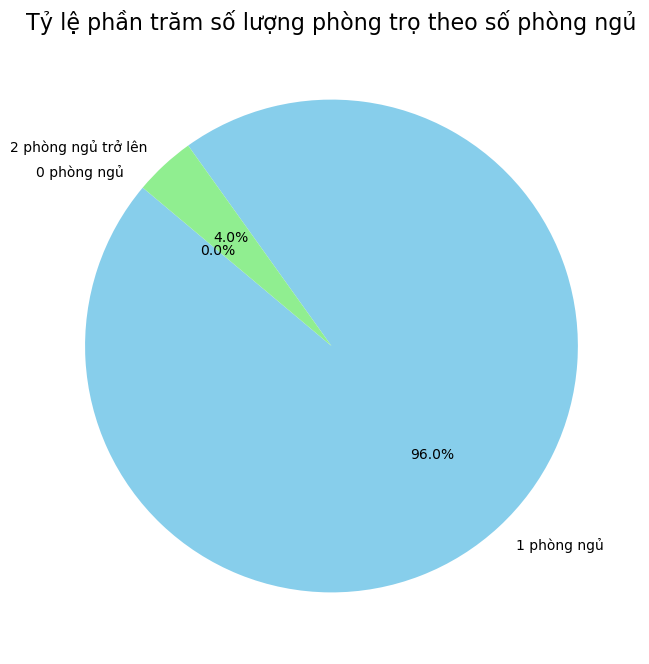

In [22]:
so_phong_tro_0 = df[df['Số phòng ngủ'] == 0].shape[0]
so_phong_tro_1 = df[df['Số phòng ngủ'] == 1].shape[0]
so_phong_tro_2_or_more = df[df['Số phòng ngủ'] >= 2].shape[0]

# Tạo dữ liệu cho biểu đồ tròn
labels = ['0 phòng ngủ', '1 phòng ngủ', '2 phòng ngủ trở lên']
values = [so_phong_tro_0, so_phong_tro_1, so_phong_tro_2_or_more]

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'skyblue', 'lightgreen'])

# Thêm tiêu đề
plt.title("Tỷ lệ phần trăm số lượng phòng trọ theo số phòng ngủ", fontsize=16)

# Hiển thị biểu đồ
plt.show()

## Trả lời
Phần trăm số lượng phòng có từ 2 phòng ngủ là `4%`, các phòng còn lại đều chỉ có `1` phòng ngủ, ta tiến hành phân tích xem các khu vực nào chứa nhiều phòng có từ 2 phòng ngủ trở lên

### Phân tích: Các phòng có từ 2 phòng ngủ trở lên tập trung ở khu vực nào?

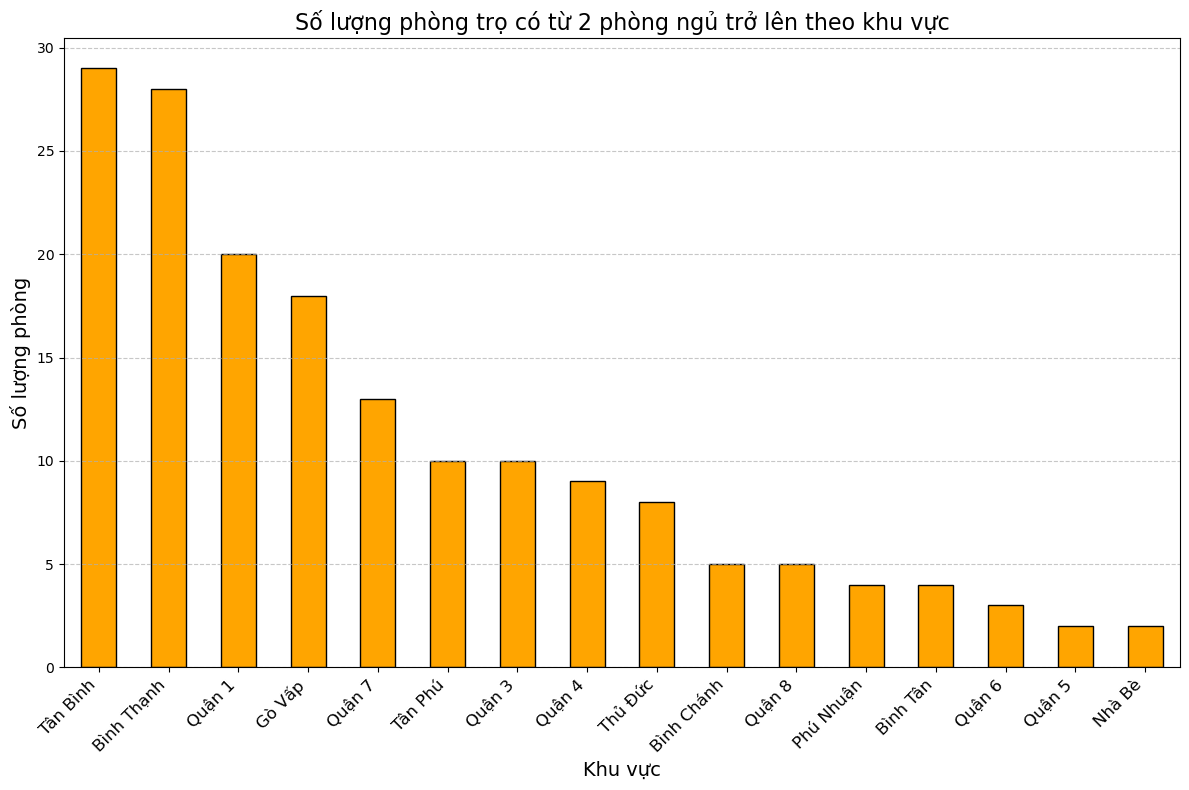

In [24]:
phong_tro_tu_2_phong_ngu = df[df['Số phòng ngủ'] >= 2]
phong_tro_theo_khu_vuc = phong_tro_tu_2_phong_ngu.groupby('Địa chỉ').size()
phong_tro_theo_khu_vuc_sorted = phong_tro_theo_khu_vuc.sort_values(ascending=False)
phong_tro_theo_khu_vuc_sorted_named = phong_tro_theo_khu_vuc_sorted.rename(index=mapping)
plt.figure(figsize=(12, 8))
phong_tro_theo_khu_vuc_sorted_named.plot(kind='bar', color='orange', edgecolor='black')

# Thêm tiêu đề và nhãn trục
plt.title("Số lượng phòng trọ có từ 2 phòng ngủ trở lên theo khu vực", fontsize=16)
plt.xlabel("Khu vực", fontsize=14)
plt.ylabel("Số lượng phòng", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()



### Nhận xét
Một số nhận xét về biểu đồ số lượng phòng trọ có từ 2 phòng ngủ trở lên theo khu vực:

1. Phân bố không đồng đều:
- Tân Bình và Bình Thạnh dẫn đầu với khoảng 28-29 phòng
- Khoảng cách khá lớn với nhóm tiếp theo (Quận 1, Gò Vấp) có 17-20 phòng
- Các quận còn lại đều dưới 15 phòng

2. Phân cụm rõ rệt:
- Nhóm dẫn đầu: Tân Bình, Bình Thạnh (>25 phòng)
- Nhóm trung bình: Quận 1, Gò Vấp (15-20 phòng)  
- Nhóm thấp: Quận 7, Tân Phú, Quận 3, 4 (8-13 phòng)
- Nhóm rất thấp: các quận còn lại (<5 phòng)

3. Xu hướng:
- Các quận trung tâm và lân cận trung tâm có số lượng cao hơn
- Các quận xa trung tâm thường có số lượng thấp hơn
- Khu vực Nhà Bè có số lượng thấp nhất, chỉ khoảng 2 phòng

Kết luận tổng quan khi phân tích cả 2 biểu đồ:

1. Về quy mô thị trường:
- Thị trường phòng trọ tập trung chủ yếu ở các quận trung tâm và lân cận như Bình Thạnh, Quận 1, Tân Bình
- Khoảng cách về số lượng phòng giữa các khu vực rất lớn: Bình Thạnh (>1000 phòng) so với Cần Giờ (<10 phòng)

2. Về tỷ lệ phòng có từ 2 phòng ngủ:
- Tỷ lệ phòng có từ 2 phòng ngủ khá thấp so với tổng số phòng có nội thất
- Ví dụ: Bình Thạnh có khoảng 29/1000 phòng (3%), Quận 1 có 20/950 phòng (2%)

3. Xu hướng thị trường:
- Các khu vực trung tâm và lân cận ưu tiên phát triển nhiều phòng đơn/studio hơn là căn hộ nhiều phòng ngủ
- Phòng trọ có sẵn nội thất chiếm số lượng áp đảo, phản ánh nhu cầu của người thuê muốn thuận tiện khi dọn vào ở
- Các quận/huyện ngoại thành (Nhà Bè, Hóc Môn, Cần Giờ) có thị trường phòng trọ kém phát triển ở cả 2 phân khúc

# Khám phá tương quan

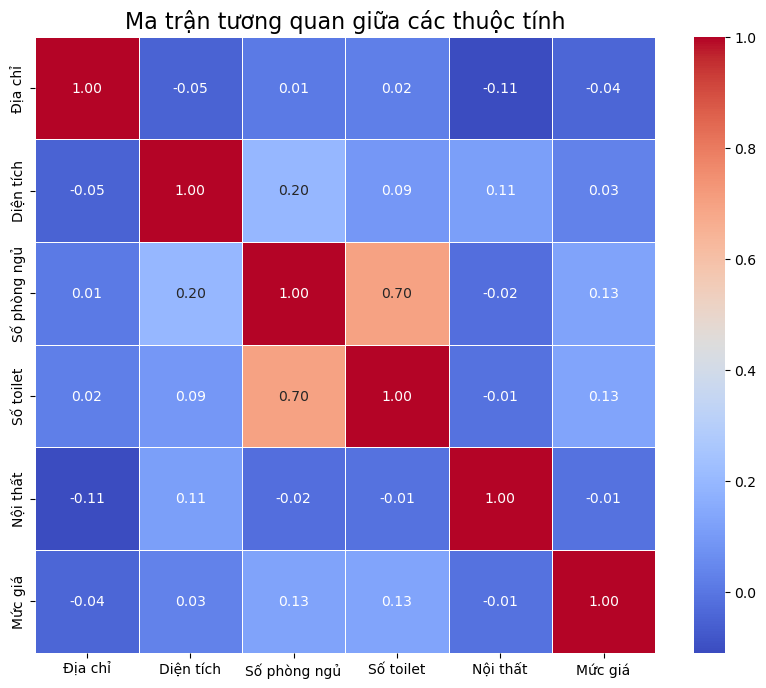

In [25]:
df_numeric = df.drop(columns=['Ngày đăng tin', 'ID'])
correlation_matrix = df_numeric.corr()
# Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Thêm tiêu đề
plt.title("Ma trận tương quan giữa các thuộc tính", fontsize=16)

# Hiển thị biểu đồ
plt.show()

# Nhận xét về ma trận tương quan

### 1. **Tương quan cao:**
   - **Số phòng ngủ và Số toilet**:
     - Hệ số tương quan là **0.70**, cho thấy mối quan hệ trực tiếp mạnh mẽ giữa số lượng phòng ngủ và số lượng toilet. Điều này hợp lý vì các phòng trọ/căn hộ lớn thường có nhiều phòng ngủ và toilet.

### 2. **Tương quan thấp hoặc gần như không có mối liên hệ:**
   - **Địa chỉ với các thuộc tính khác**:
     - Hệ số tương quan của `Địa chỉ` với hầu hết các thuộc tính như `Diện tích`, `Số phòng ngủ`, `Số toilet`, và `Mức giá` là rất thấp (gần 0), cho thấy rằng vị trí (được mã hóa bởi `Địa chỉ`) không có mối liên hệ rõ rệt với các yếu tố này trong tập dữ liệu.
   - **Nội thất với các thuộc tính khác**:
     - `Nội thất` có hệ số tương quan rất thấp hoặc âm (ví dụ, với `Diện tích`: **0.11**, `Mức giá`: **-0.01**), cho thấy rằng nội thất không có mối liên hệ mạnh với các thuộc tính này.

### 3. **Tương quan yếu nhưng hợp lý:**
   - **Diện tích và Số phòng ngủ**:
     - Hệ số tương quan là **0.20**, cho thấy một mối liên hệ yếu. Điều này có thể là do diện tích không nhất thiết quyết định trực tiếp số phòng ngủ (ví dụ: các phòng trọ có thể thiết kế linh hoạt).
   - **Diện tích và Mức giá**:
     - Hệ số tương quan là **0.03**, rất thấp. Điều này cho thấy mức giá không hoàn toàn phụ thuộc vào diện tích mà có thể bị ảnh hưởng bởi các yếu tố khác như vị trí, nội thất, hoặc tiện ích.

### 4. **Hệ số tương quan bằng hoặc gần 1**:
   - Tất cả các thuộc tính đều có hệ số tương quan bằng 1 với chính nó (ví dụ, `Số phòng ngủ` với `Số phòng ngủ`), điều này là hiển nhiên.

### 5. **Mức giá không tương quan mạnh với bất kỳ yếu tố nào:**
   - `Mức giá` có hệ số tương quan thấp với tất cả các thuộc tính khác, cho thấy mức giá có thể bị ảnh hưởng bởi nhiều yếu tố ngoài các yếu tố được đo lường trong tập dữ liệu này.

---

### Kết luận:
- Mối quan hệ đáng chú ý nhất là giữa **Số phòng ngủ** và **Số toilet**.
- Các thuộc tính còn lại như **Mức giá**, **Nội thất**, và **Địa chỉ** không có mối liên hệ mạnh với các thuộc tính khác, điều này cho thấy cần thêm dữ liệu hoặc thuộc tính khác để phân tích tốt hơn.
